<a href="https://colab.research.google.com/github/PrajwalKumar07/disease-prediction-logistic-regression/blob/main/datasetfiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   age   bmi  blood_sugar  exercise_hours  disease
0   22  21.8           82               6        0
1   25  23.5           90               5        0
2   28  25.0          105               4        0
3   30  26.2          115               3        0
4   32  27.1          120               3        0

Shape: (30, 5)

✅ Accuracy: 1.0

✅ Confusion Matrix:
[[1 0]
 [0 7]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         7

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


Prediction for new patient:
Probability of Disease: 1.0
Predicted Class (0=No / 1=Yes): 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


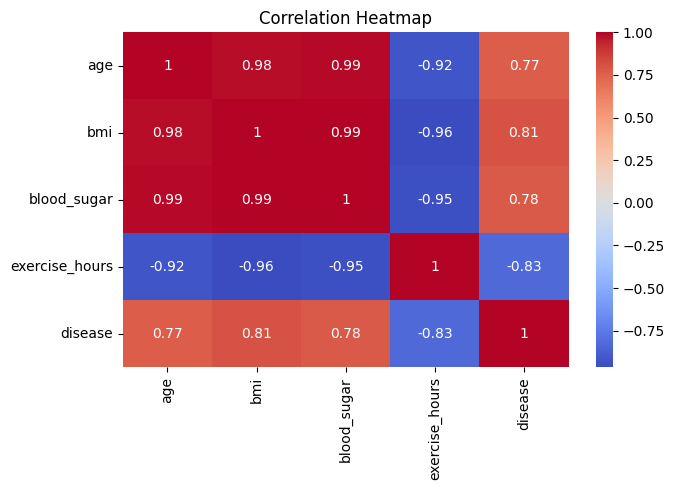

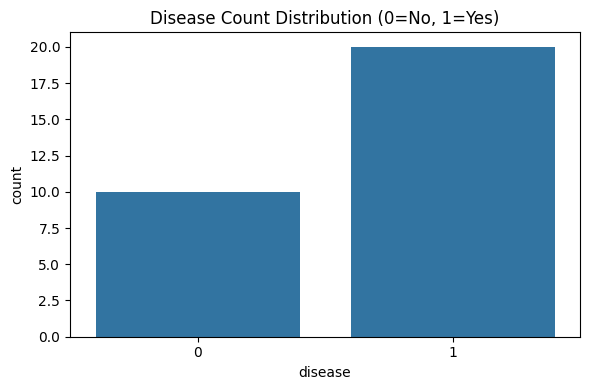

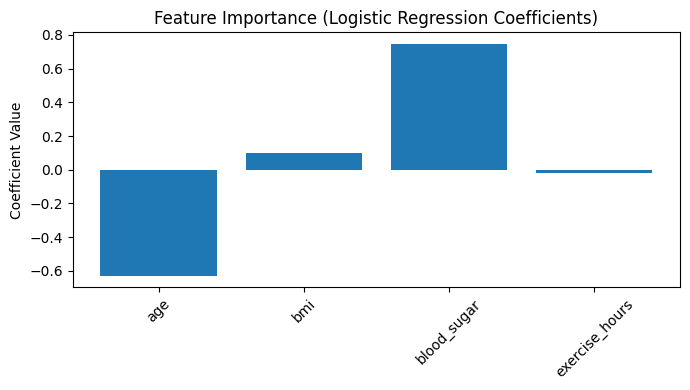

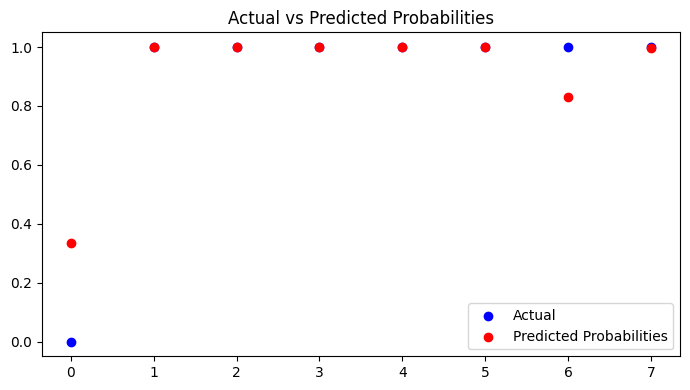

In [ ]:
# -----------------------------
# Disease Prediction using Logistic Regression + Graphs + Save Images
# -----------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 1. Load Dataset
# -----------------------------
url = "https://raw.githubusercontent.com/PrajwalKumar07/disease-prediction-logistic-regression/main/disease_data.csv"
df = pd.read_csv(url)

print("Dataset Preview:")
print(df.head())
print("\nShape:", df.shape)

# -----------------------------
# 2. Separate features & target
# -----------------------------
X = df.drop("disease", axis=1)
y = df["disease"]

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------------
# 4. Build Logistic Regression Model
# -----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# -----------------------------
# 5. Predictions
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# -----------------------------
# 6. Evaluation
# -----------------------------
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------
# 7. Predict on new data (example)
# -----------------------------
patient = np.array([[50, 130, 160, 220]])
prob = model.predict_proba(patient)[0][1]
pred = model.predict(patient)[0]

print("\nPrediction for new patient:")
print("Probability of Disease:", round(prob, 4))
print("Predicted Class (0=No / 1=Yes):", pred)

# -----------------------------
# 8. Visualization Graphs
# -----------------------------


# --- A. Correlation Heatmap ---
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")   # ✅ save image
plt.show()


# --- B. Disease Count Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Disease Count Distribution (0=No, 1=Yes)")
plt.tight_layout()
plt.savefig("disease_count.png")    # ✅ save image
plt.show()


# --- C. Feature Importance ---
coeff = model.coef_[0]
features = X.columns

plt.figure(figsize=(7,4))
plt.bar(features, coeff)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("feature_importance.png")   # ✅ save image
plt.show()


# --- D. Actual vs Predicted Probabilities ---
plt.figure(figsize=(7,4))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_prob)), y_prob, color='red', label='Predicted Probabilities')
plt.title("Actual vs Predicted Probabilities")
plt.legend()
plt.tight_layout()
plt.savefig("predicted_probabilities.png")   # ✅ save image
plt.show()
